In [46]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
import datetime
from dateutil.relativedelta import relativedelta

In [2]:
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [7]:
data = pd.read_csv("WAG_C_M.csv",';',index_col=['month'], parse_dates=['month'], dayfirst=True)
data = data.rename(columns = {'WAG_C_M':'Salary'})

In [9]:
data.head(3)

,Salary
month,
1993-01-01,15.3
1993-02-01,19.1
1993-03-01,23.6


In [58]:
data.shape

(284, 5)

In [59]:
data

,Salary,salary_box,salary_box_diff12,salary_box_diff1,model
month,,,,,
1993-01-01,15.3,3.990393,NaN,NaN,1.000000
1993-02-01,19.1,4.458758,NaN,NaN,15.300000
1993-03-01,23.6,4.931635,NaN,NaN,19.100000
1993-04-01,30.6,5.549430,NaN,NaN,23.600000
1993-05-01,37.5,6.063406,NaN,NaN,30.600000
1993-06-01,47.4,6.690719,NaN,NaN,37.500000
1993-07-01,56.0,7.161310,NaN,NaN,47.400000
1993-08-01,65.4,7.618224,NaN,NaN,56.000000
1993-09-01,80.9,8.275619,NaN,NaN,65.400000


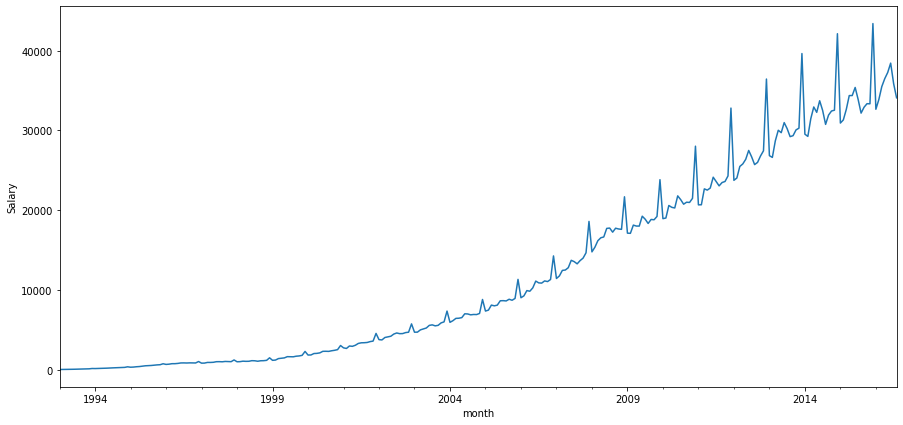

In [14]:
plt.figure(figsize = (15,7))
data.Salary.plot()
plt.ylabel('Salary')
plt.show()

Критерий Дики-Фуллера: p=0.991850


<Figure size 1080x720 with 0 Axes>

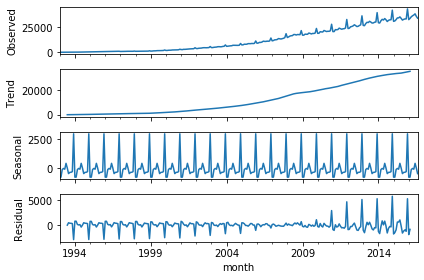

In [18]:
plt.figure(figsize = (15,10))
sm.tsa.seasonal_decompose(data.Salary).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.Salary)[1])

## Стабилизация дисперсии
Сделаем преобразование Бокса-Кокса для стабилизации дисперсии:

Оптимальный параметр преобразования Бокса-Кокса: 0.263202
Критерий Дики-Фуллера: p=0.696899


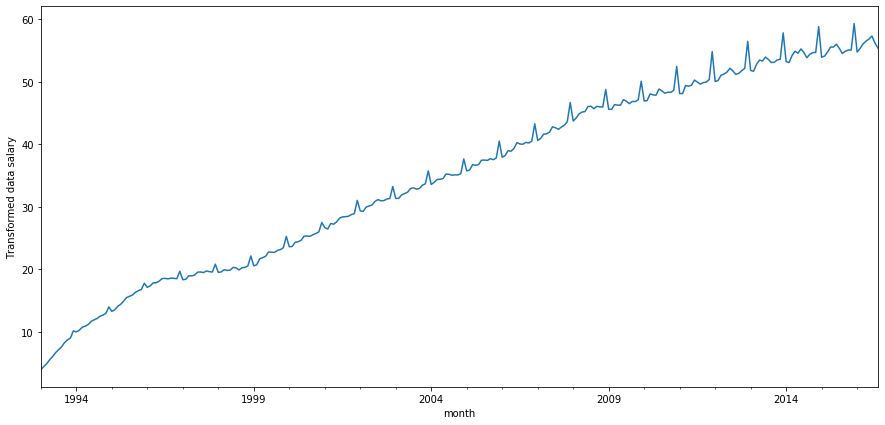

In [20]:
data['salary_box'], lmbda = stats.boxcox(data.Salary)
plt.figure(figsize = (15,7))
data.salary_box.plot()
plt.ylabel(u'Transformed data salary')
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.salary_box)[1])

Кретерий Дики - Фуллера уменьшился

Не отвергает теорию нестационарности, попробуем сделать сезонное дифференцирование


Критерий Дики-Фуллера: p=0.014697


<Figure size 1080x720 with 0 Axes>

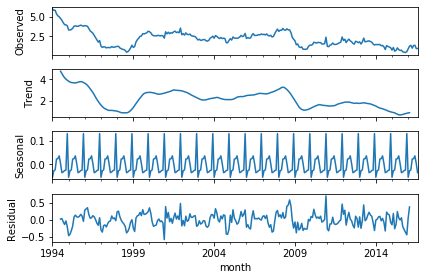

In [22]:
data['salary_box_diff12'] = data.salary_box - data.salary_box.shift(12)
plt.figure(figsize = (15,10))
sm.tsa.seasonal_decompose(data.salary_box_diff12[12:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.salary_box_diff12[12:])[1])

Все еще присутствует тренд
Примечание: После дифференцирование лучше удалить NaN'ы

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x720 with 0 Axes>

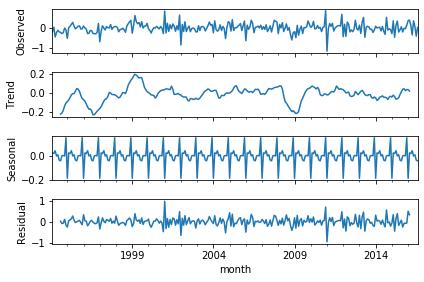

In [24]:
data['salary_box_diff1'] = data.salary_box_diff12 - data.salary_box_diff12.shift(1)
plt.figure(figsize = (15,10))
sm.tsa.seasonal_decompose(data.salary_box_diff1[13:]).plot()   
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.salary_box_diff1[13:])[1])

## Подбор модели


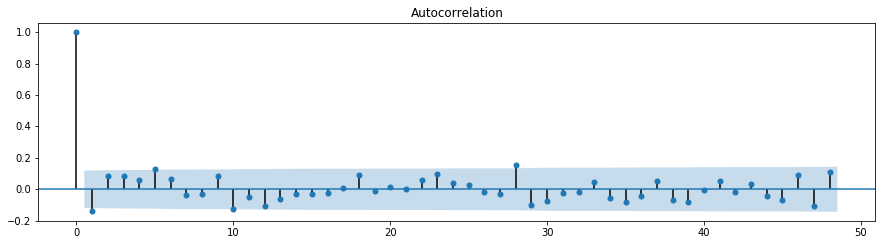

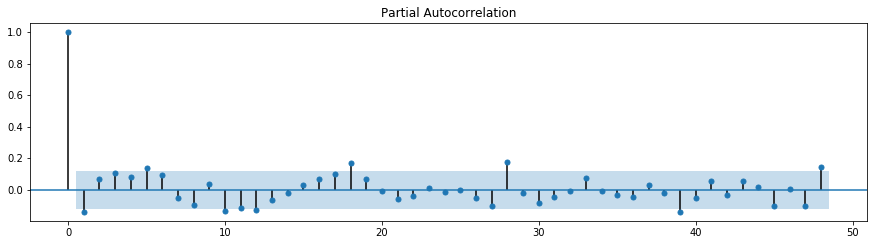

In [26]:
plt.figure(figsize = (15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.salary_box_diff1[13:].values.squeeze(), lags=48, ax=ax)
plt.show()
plt.figure(figsize = (15,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.salary_box_diff1[13:].values.squeeze(), lags=48, ax=ax)
plt.show()

Q = 5, q = 1, P = 5, p = 1 - начальные параметры

In [27]:
ps = range(0, 1)
d=1
qs = range(0, 1)
Ps = range(0, 6)
D=1
Qs = range(0, 6)

In [28]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)
#Всего параметров 36

36

#### Поиск лучшей модели

In [29]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data.salary_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 13min 34s


In [50]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters       aic
23  (0, 0, 3, 5) -8.044217
10  (0, 0, 1, 4) -7.470613
25  (0, 0, 4, 1) -7.007339
28  (0, 0, 4, 4) -6.819112
14  (0, 0, 2, 2) -6.539703


Лучшая модель

In [51]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         salary_box   No. Observations:                  284
Model:             SARIMAX(0, 1, 0)x(3, 1, 5, 12)   Log Likelihood                  13.022
Date:                            Thu, 07 May 2020   AIC                             -8.044
Time:                                    13:13:48   BIC                             24.375
Sample:                                01-01-1993   HQIC                             4.972
                                     - 08-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.6912      0.199      3.479      0.001       0.302       1.081
ar.S.L24      -0.4656      0.266   

Критерий Стьюдента: p=0.911833
Критерий Дики-Фуллера: p=0.000103


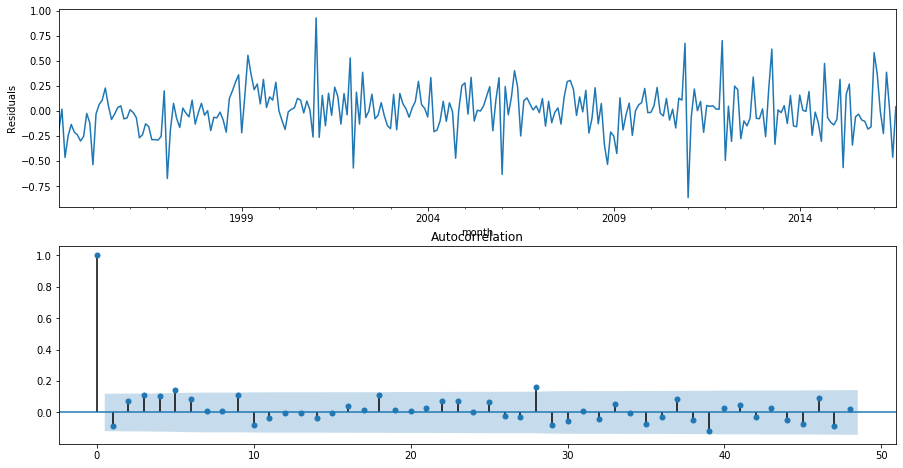

In [52]:
plt.figure(figsize = (15,8))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

### Проверка аппроксимации

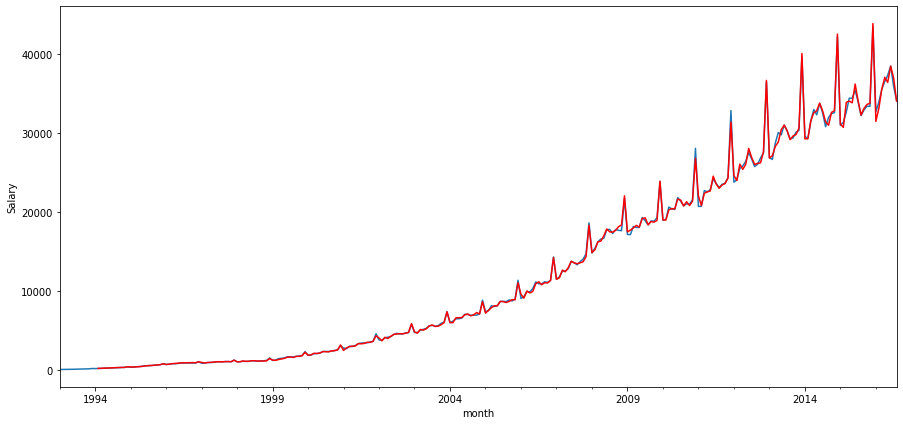

In [53]:
data['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize = (15,7))
data.Salary.plot()
data.model[13:].plot(color='r')
plt.ylabel('Salary')
plt.show()

### Прогнозирование

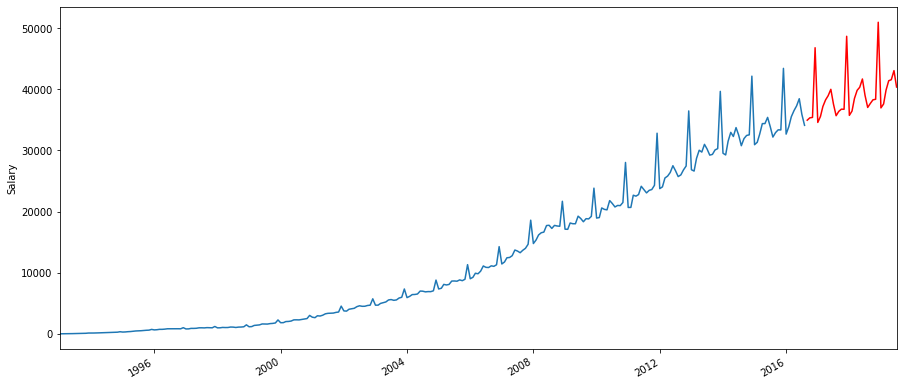

In [60]:
data2 = data[['Salary']]
#Прогнозирование на 36 месяцев вперед
date_list = [datetime.datetime.strptime("2016-08-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,36)]
future = pd.DataFrame(index=date_list, columns= data2.columns)
data2 = pd.concat([data2, future])
data2['forecast'] = invboxcox(best_model.predict(start=284, end=319), lmbda)

plt.figure(figsize = (15,7))
data2.Salary.plot()
data2.forecast.plot(color='r')
plt.ylabel('Salary')
plt.show()

In [61]:
data.head(5)

,Salary,salary_box,salary_box_diff12,salary_box_diff1,model
month,,,,,
1993-01-01,15.3,3.990393,NaN,NaN,1.0
1993-02-01,19.1,4.458758,NaN,NaN,15.3
1993-03-01,23.6,4.931635,NaN,NaN,19.1
1993-04-01,30.6,5.549430,NaN,NaN,23.6
1993-05-01,37.5,6.063406,NaN,NaN,30.6
